[[6.000000e+00 6.000000e+00 5.200000e+01 5.200000e+01 5.000000e+00
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.200000e+01 5.200000e+01 5.000000e+00
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.200000e+01 5.200000e+01 5.000000e+00
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.200000e+01 5.200000e+01 5.000000e+00
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.200000e+01 5.200000e+01 5.000000e+00
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.200000e+01 5.200000e+01 1.000000e+01
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.200000e+01 5.300000e+01 1.400000e+01
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.300000e+01 5.400000e+01 1.600000e+01
  5.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.000000e+00 5.400000e+01 5.500000e+01 1.700000e+01
  8.000000e+00 5.700000e+01 5.000000e+00]
 [6.000000e+00 6.00

C:\Users\sando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (48). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\sando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (145). n_quantiles is set to n_samples.
  warnings.warn(


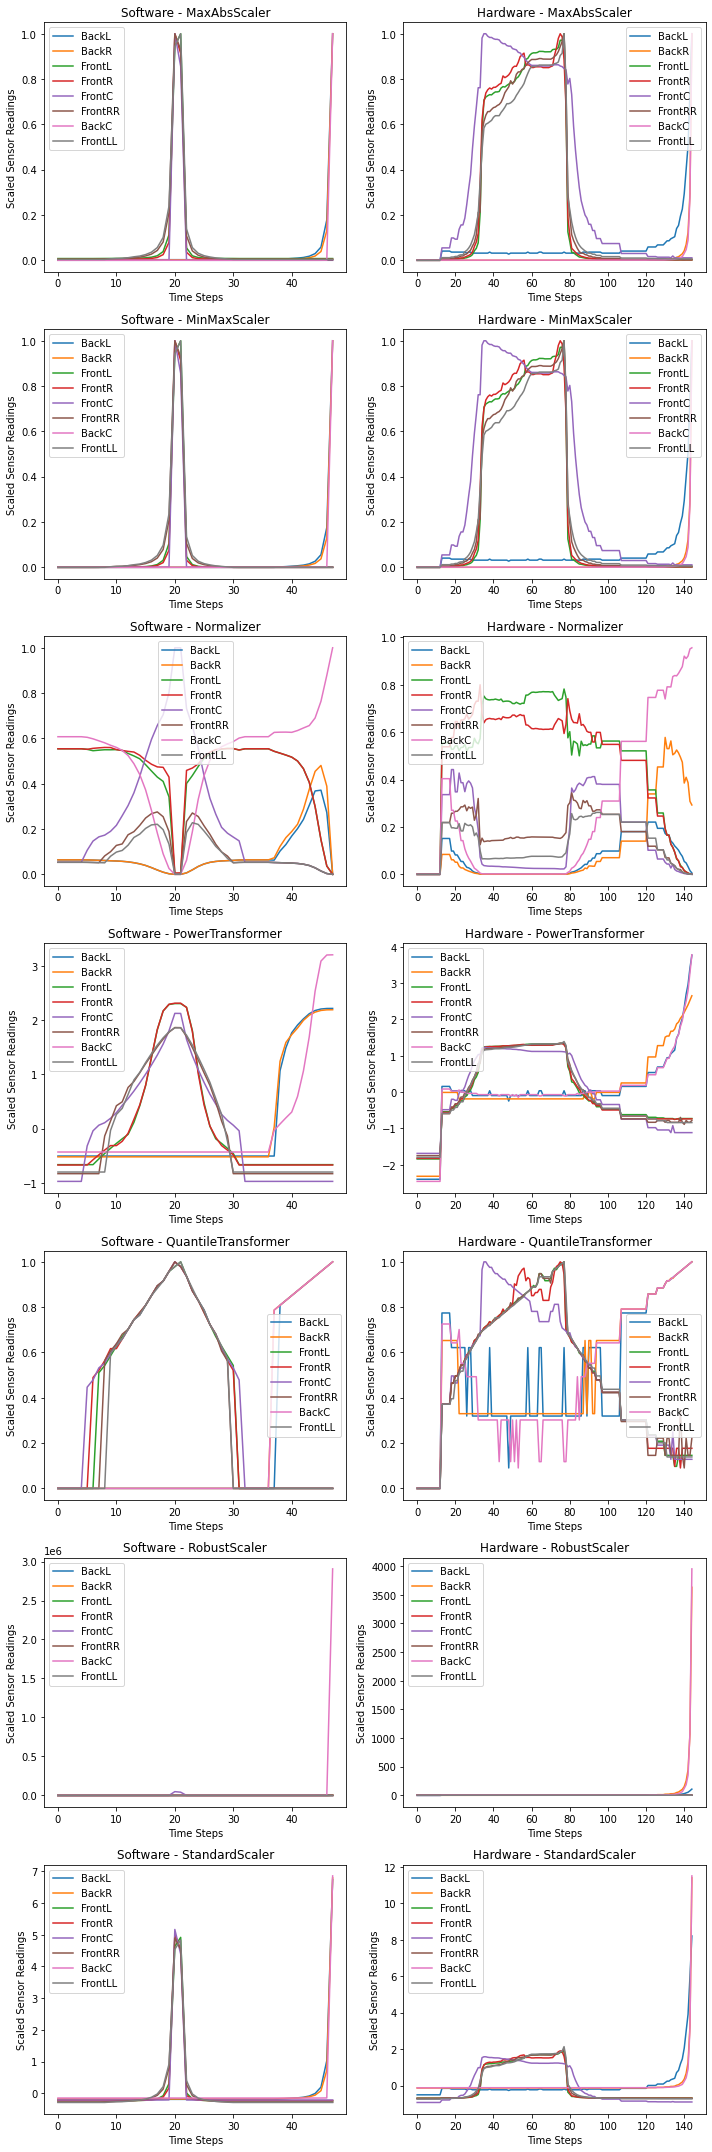

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
)

# Load data from extremes_software.txt
software_data = np.loadtxt('extremes_software.txt', skiprows=1)
print(software_data)

# Load data from extremes_hardware.txt
hardware_data = np.loadtxt('extremes_hardware.txt', skiprows=1)

# Sensor names
sensor_names = ['BackL', 'BackR', 'FrontL', 'FrontR', 'FrontC', 'FrontRR', 'BackC', 'FrontLL']

# Apply various scalers
scalers = [
    MaxAbsScaler(),
    MinMaxScaler(),
    Normalizer(),
    PowerTransformer(),
    QuantileTransformer(),
    RobustScaler(),
    StandardScaler(),
]

# Set the number of rows and columns for subplots
num_rows = 7
num_cols = 2
countr = 1

# Plot each sensor with different scalers
plt.figure(figsize=(10, 30))

for j, scaler in enumerate(scalers):
    # Fit and transform the data with the current scaler
    scaler_hardware = scaler
    scaled_software_data = scaler.fit_transform(software_data)
    scaled_hardware_data = scaler_hardware.fit_transform(hardware_data)
    
    if j == 3:
        joblib.dump(scaler_hardware, 'hardware_powertrans_scaler.gz')
        joblib.dump(scaler, 'software_powertrans_scaler.gz')
    if j == 1:
        joblib.dump(scaler_hardware, 'hardware_minmax_scaler.gz')
        joblib.dump(scaler, 'software_minmax_scaler.gz')

    # Plot the scaled data
    plt.subplot(num_rows, num_cols, countr)
    for i, sensor_name in enumerate(sensor_names):
        plt.plot(scaled_software_data[:, i], label=f"{sensor_name}")
        
    plt.title(f"Software - {type(scaler).__name__}")
    plt.xlabel("Time Steps")
    plt.ylabel("Scaled Sensor Readings")
    plt.legend()
        
    # Plot the scaled data
    plt.subplot(num_rows, num_cols, countr + 1)
    for i, sensor_name in enumerate(sensor_names):
        plt.plot(scaled_hardware_data[:, i], label=f"{sensor_name}")

    plt.title(f"Hardware - {type(scaler).__name__}")
    plt.xlabel("Time Steps")
    plt.ylabel("Scaled Sensor Readings")
    plt.legend()
    countr += 2

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("different_scalers.png")
